In [1]:
import os
import numpy as np
from cv2 import *
import cv2
import matplotlib.pyplot as plt

In [2]:
capture = cv2.VideoCapture(0) #Camera
if not capture.isOpened():
    exit()

In [3]:
# load the model
face_detector = cv2.FaceDetectorYN.create("face_detection_yunet_2022mar.onnx", "", (320, 320))

In [4]:
while True:
    # Capture frame and load image
    result, image = capture.read()
    if result is False:
        cv2.waitKey(0)
        break

    # If the image is not 3 channels, convert it to 3 channels
    channels = 1 if len(image.shape) == 2 else image.shape[2]
    if channels == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    if channels == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

    # specify the input size
    height, width, _ = image.shape
    face_detector.setInputSize((width, height))

    # detect faces
    ret, faces = face_detector.detect(image)
    faces = faces if faces is not None else []
    

    # Draw bounding boxes and landmarks for detected faces
    for face in faces:
        # bounding box
        box = list(map(int, face[:4]))
        color = (0, 0, 255)
        thickness = 2
        cv2.rectangle(image, box, color, thickness, cv2.LINE_AA)
        
        # Landmarks (Right Eye, Left Eye, Nose, Right Mouth Corner, Left Mouth Corner)
        landmarks = list(map(int, face[4:len(face)-1]))
        landmarks = np.array_split(landmarks, len(landmarks) / 2)
        for landmark in landmarks:
            radius = 5
            thickness = -1
            cv2.circle(image, landmark, radius, color, thickness, cv2.LINE_AA)
                
        # Degree of reliability
        confidence = face[-1]
        confidence = "{:.2f}".format(confidence)
        position = (box[0], box[1] - 10)
        font = cv2.FONT_HERSHEY_SIMPLEX
        scale = 0.5
        thickness = 2
        cv2.putText(image, confidence, position, font, scale, color, thickness, cv2.LINE_AA)

    cv2.imwrite("1.png", image)
    # display the image
    cv2.imshow("face detection", image)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break
cv2.destroyAllWindows()

## Output:

In [5]:
img = cv2.imread("1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

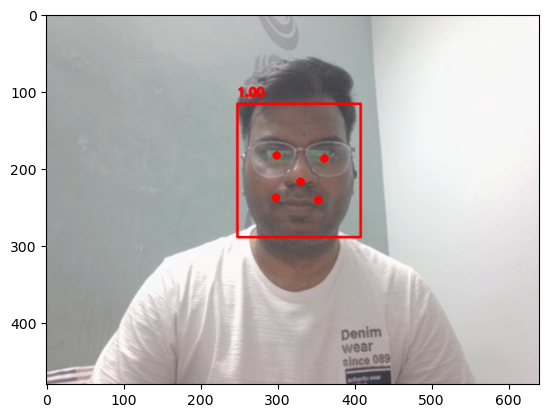

In [6]:
plt.imshow(img)